In [34]:
from crr_model import *
import numpy as np
import matplotlib.pyplot as plt

In [35]:
u = 1.3
d = 0.8
r = 0.1
T = 10
S0 = 100
pstar = (1 + r - d) / (u - d)
model = CRRModel(u, d, r, T, S0)

## Europejska call

In [36]:
strike = 90
instrument = EuropeanCall(strike)
print("Wartość teoretyczna:")
print((1+r)**(-T) * sum([math.comb(T,i) * (pstar**i) * ((1-pstar)**(T-i)) * max((S0 * (u**i) * (d**(T-i))) - strike,0) for i in range(T+1)]))
print("Wartość obliczona dzięki modelowi:")
print(model.price_instrument(instrument))
##Są pewne różnice numeryczne

Wartość teoretyczna:
66.97006486520779
Wartość obliczona dzięki modelowi:
66.97006486520782


## Europejska put

In [37]:
strike = 90
instrument = EuropeanPut(strike)
print("Wartość teoretyczna:")
print((1+r)**(-T) * sum([math.comb(T,i) * (pstar**i) * ((1-pstar)**(T-i)) * max(strike - (S0 * (u**i) * (d**(T-i))),0) for i in range(T+1)]))
print("Wartość obliczona dzięki modelowi:")
print(model.price_instrument(instrument))

Wartość teoretyczna:
1.6689609138656192
Wartość obliczona dzięki modelowi:
1.66896091386562


## Maksimum po trajektorii

In [38]:
instrument = MaximumInstrument()
print("Wartość obliczona dzięki modelowi:")
print(model.price_instrument(instrument))

Wartość obliczona dzięki modelowi:
116.87742273846627


## Wizualizacja

In [39]:
strikes = np.linspace(50, 350, 1001)
calls = [EuropeanCall(strike) for strike in strikes]
puts = [EuropeanPut(strike) for strike in strikes]
call_rationals = list(map(model.price_instrument, calls))
put_rationals = list(map(model.price_instrument, puts))

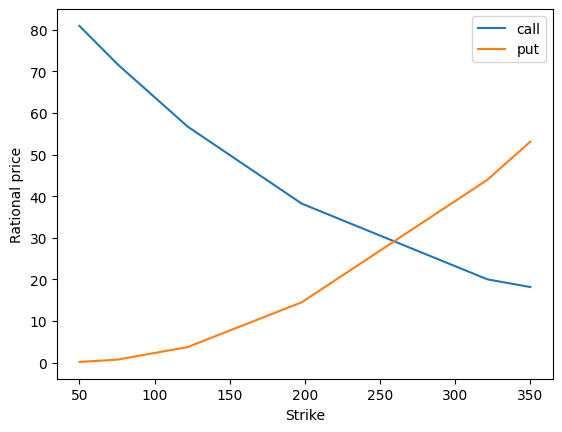

In [32]:
plt.plot(strikes, call_rationals, label="call")
plt.plot(strikes, put_rationals, label="put")
plt.xlabel("Strike")
plt.ylabel("Rational price")
plt.legend()